<h1>The Sparks Foundation - GRIP<br>
<b>TASK 1: Exploratory Data Analysis - Retail<b><h1>

<h2>Author - Sakshi Shivaji Shivnikar</h2>
(Data Science and Business Analytics Intern at The Sparks Foundation)

Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’.

**Loading The Dataset**

In [1]:
import pandas as pd
storedata_df = pd.read_csv("SampleSuperstore.csv")

**Top 5 rows of the dataframe**

In [2]:
storedata_df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


**UNDERSTANDING THE DATA**

In [3]:
# Summary of the dataframe
storedata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


**Statistical details of the dataset**

In [4]:
storedata_df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


Maximum Profit value is 8399.97 and average is 28.65, there's a large gap as we can see.

In [5]:
# Shape of Dataset
storedata_df.shape

(9994, 13)

In [6]:
# Finding all columns names 
storedata_df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [7]:
storedata_df.duplicated().sum() # number duplicated data

17

**Checking the dataset for duplicate and dropping element**

In [8]:
storedata_df.drop_duplicates()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


**Remove unrequired columns**

In [9]:
storedata_df.drop(columns = ['Postal Code'], inplace=True)
storedata_df

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


**Function return Series with number of distinct observations over requested**

In [10]:
storedata_df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

**Exploratory Analysis and Visualization**

Instead of looking at the boring numbers lets visualize the data and see what things are affecting the profit and other areas.

Let's begin by importing matplotlib.pyplot and seaborn.

In [11]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
# %matplotlib inline is a magic function that renders the figure in a notebook 

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**Creating a Dataframe containing data in descending order of Profit** <br>
So that we can find what factor lead to good profits.

In [12]:
sorted_df = storedata_df.sort_values(by = "Profit", ascending=False)

In [13]:
sorted_df.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
6826,Standard Class,Corporate,United States,Lafayette,Indiana,Central,Technology,Copiers,17499.95,5,0.0,8399.9760
8153,First Class,Consumer,United States,Seattle,Washington,West,Technology,Copiers,13999.96,4,0.0,6719.9808
4190,Standard Class,Consumer,United States,Newark,Delaware,East,Technology,Copiers,10499.97,3,0.0,5039.9856
9039,Standard Class,Consumer,United States,Detroit,Michigan,Central,Office Supplies,Binders,9892.74,13,0.0,4946.3700
4098,Standard Class,Consumer,United States,Minneapolis,Minnesota,Central,Office Supplies,Binders,9449.95,5,0.0,4630.4755


**Numerical Data**

In [14]:
numerical_df = sorted_df[["Sales","Quantity","Discount","Profit"]]
numerical_df

,Sales,Quantity,Discount,Profit
6826,17499.950,5,0.0,8399.9760
8153,13999.960,4,0.0,6719.9808
4190,10499.970,3,0.0,5039.9856
9039,9892.740,13,0.0,4946.3700
4098,9449.950,5,0.0,4630.4755
...,...,...,...,...
4991,1889.990,5,0.8,-2929.4845
3011,2549.985,5,0.7,-3399.9800
9774,2177.584,8,0.8,-3701.8928
683,7999.980,4,0.5,-3839.9904


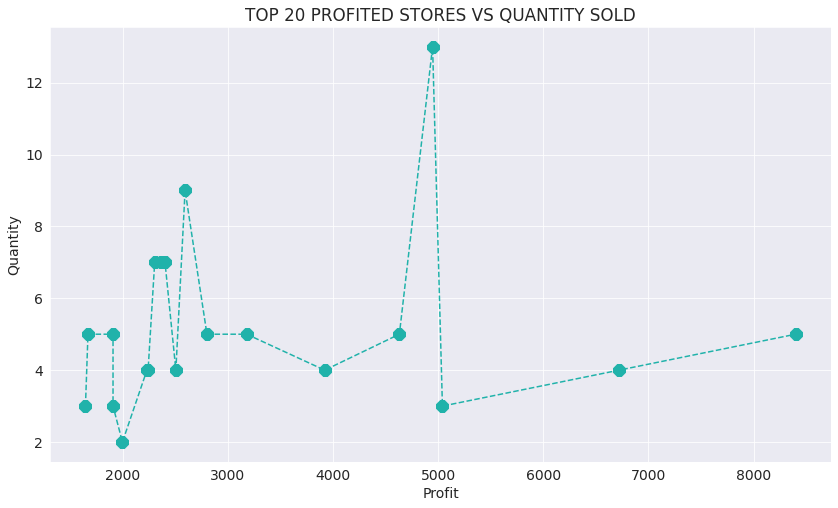

In [15]:
plt.figure(figsize=(14,8))
plt.title("TOP 20 PROFITED STORES VS QUANTITY SOLD")
plt.xlabel('Profit')
plt.ylabel('Quantity')
plt.plot(numerical_df.Profit.head(20).iloc[::-1],numerical_df.Quantity.head(20).iloc[::-1], color='lightseagreen', marker='8', markersize=12, linestyle='dashed');

Relation between Quantity sold and Profit is uneven.

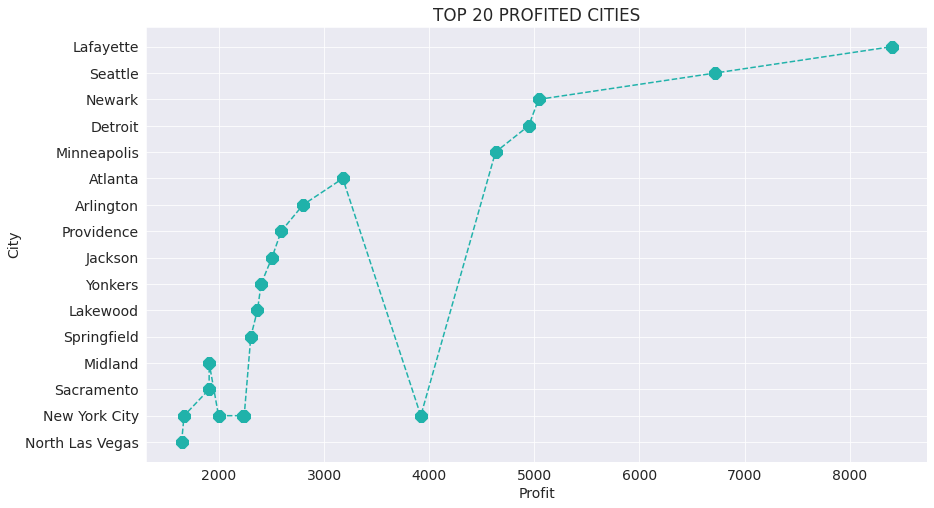

In [16]:
plt.figure(figsize=(14,8))
plt.title("TOP 20 PROFITED CITIES")
plt.xlabel('Profit')
plt.ylabel('City')
plt.plot(sorted_df.Profit.head(20).iloc[::-1],sorted_df.City.head(20).iloc[::-1], color='lightseagreen', marker='8', markersize=12, linestyle='dashed');
# Sales in Lafayette have earned maximum Profit

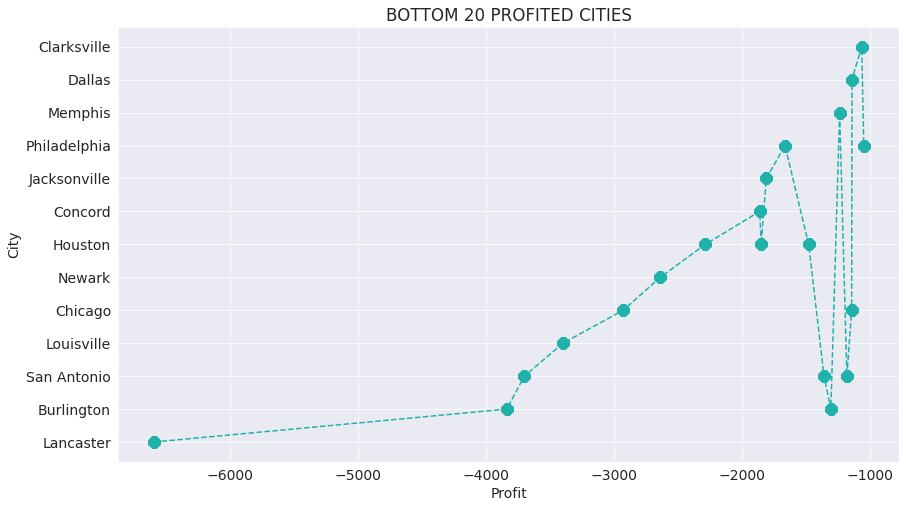

In [17]:
plt.figure(figsize=(14,8))
plt.title("BOTTOM 20 PROFITED CITIES")
plt.xlabel('Profit')
plt.ylabel('City')
plt.plot(sorted_df.Profit.tail(20).iloc[::-1],sorted_df.City.tail(20).iloc[::-1], color='lightseagreen', marker='8', markersize=12, linestyle='dashed');
# Sales in Lancaster have faced drastic loss

There seems to be drastic change in the Profit. This tells us that every city sales have independent and distinct influences of the features we are talking about.

**Influencers of Profit**

In [18]:
corrMatrix = numerical_df.corr()
print (corrMatrix)

             Sales  Quantity  Discount    Profit
Sales     1.000000  0.200795 -0.028190  0.479064
Quantity  0.200795  1.000000  0.008623  0.066253
Discount -0.028190  0.008623  1.000000 -0.219487
Profit    0.479064  0.066253 -0.219487  1.000000


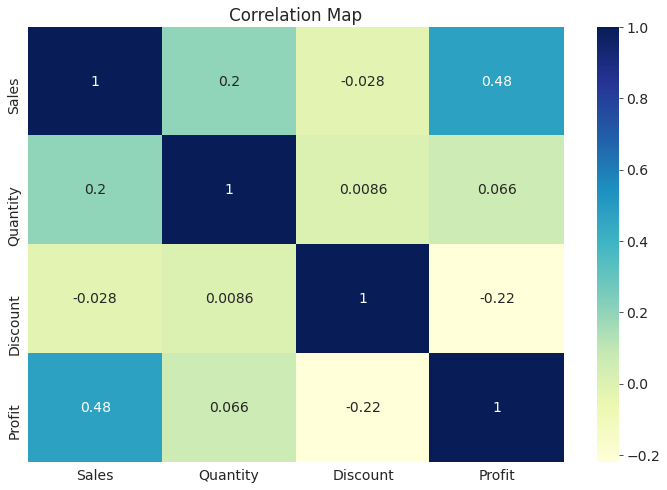

In [19]:
# Visualization of Corr Matrix
fig = plt.gcf()
fig.set_size_inches(12, 8)
sns.heatmap(corrMatrix, annot=True, cmap='YlGnBu')
plt.title('Correlation Map')
plt.show() # darkest is most correlated and so on

Following are the insights we can take away from the correlation map:<br>
1) Profit is primarily dependant on Sales, the store makes. More the sales more the profit.<br>
2) Sales indirectly are dependant on the quantity available. If optimum quantity of products are available, increase in sales can be seen.<br>
3) Discount and profit as we can see are inversely related.<br>
**So talking about maximizing Profit, more the sales more is the Profit.**

Let's explore the data more and understand it visually.

We will see effects of different features on Sales and Profit.

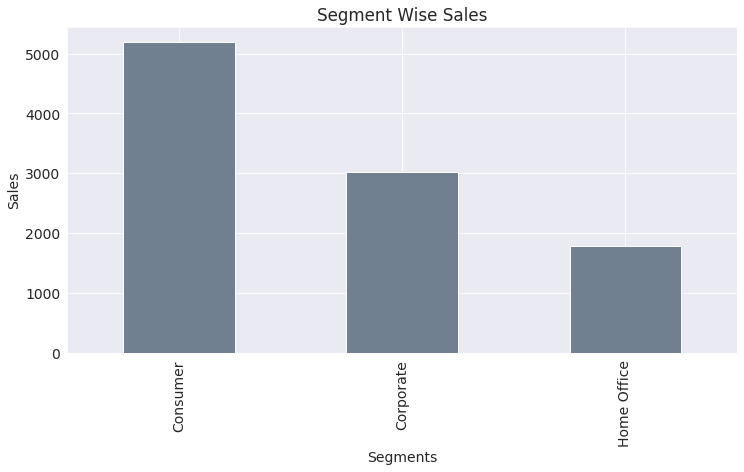

In [20]:
# Segment wise sales
plt.figure(figsize=(12,6))
sorted_df['Segment'].value_counts().plot.bar(color=['slategrey'])
plt.title('Segment Wise Sales')
plt.ylabel('Sales')
plt.xlabel('Segments')
plt.show()

# Consumer tops all the Markets

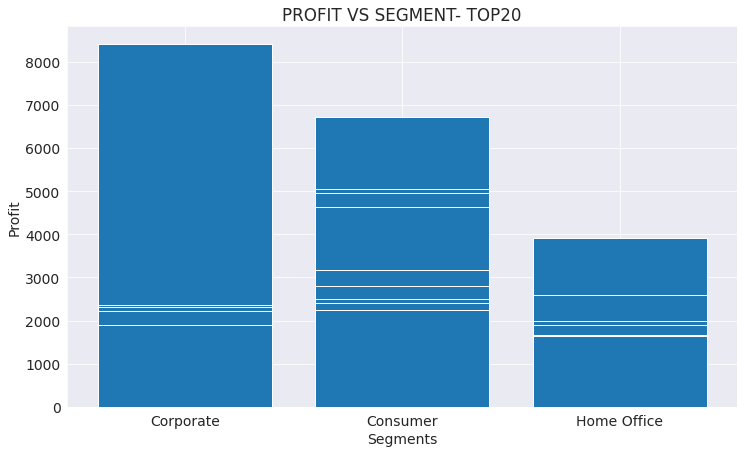

In [21]:
fig = plt.figure(figsize =(12, 7))

plt.bar(sorted_df['Segment'].head(20),sorted_df['Profit'].head(20))
plt.title('PROFIT VS SEGMENT- TOP20')
plt.xlabel('Segments')
plt.ylabel('Profit')
plt.show()
 
# Corporate segment gives out high profits

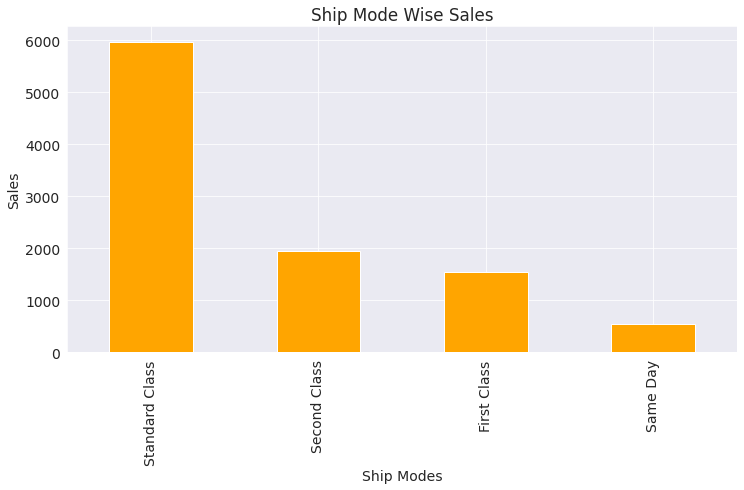

In [22]:
# Ship mode wise sales
plt.figure(figsize=(12,6))
sorted_df['Ship Mode'].value_counts().plot.bar(color=['Orange'])
plt.title('Ship Mode Wise Sales')
plt.ylabel('Sales')
plt.xlabel('Ship Modes')
plt.show()

# Standard Class tops all the Transport Methods

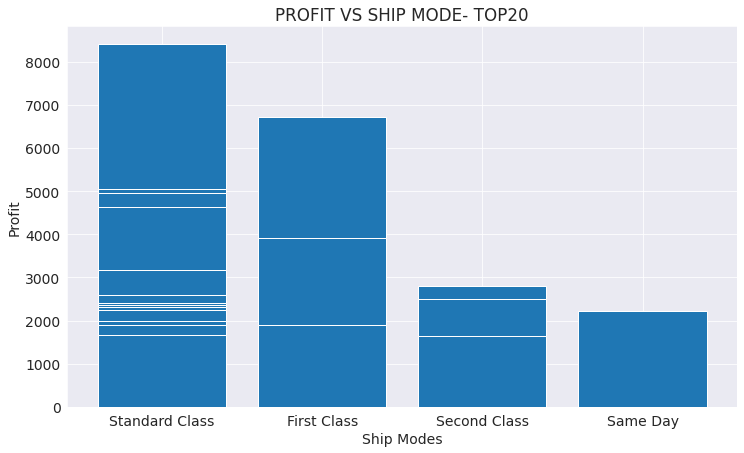

In [23]:
fig = plt.figure(figsize =(12, 7))

plt.bar(sorted_df['Ship Mode'].head(20),sorted_df['Profit'].head(20))
plt.title('PROFIT VS SHIP MODE- TOP20')
plt.xlabel('Ship Modes')
plt.ylabel('Profit')
plt.show()

# high profits are gained under standard class shipping

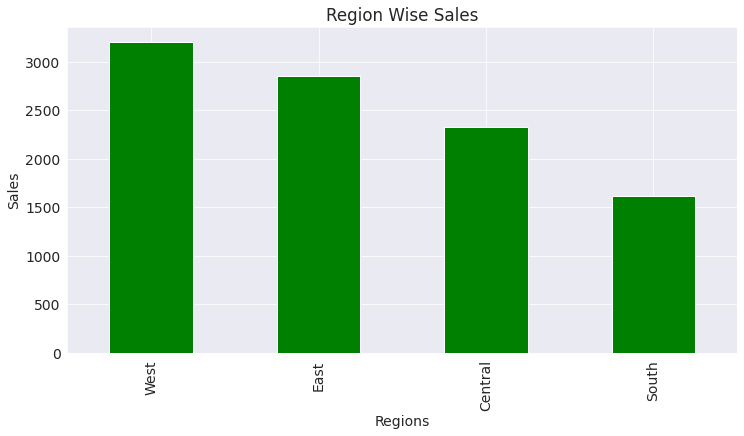

In [24]:
#Region wise sales
plt.figure(figsize=(12,6))
sorted_df['Region'].value_counts().plot.bar(color=['Green'])
plt.title('Region Wise Sales')
plt.ylabel('Sales')
plt.xlabel('Regions')
plt.show()

# Western Region tops all the Sales in Regions

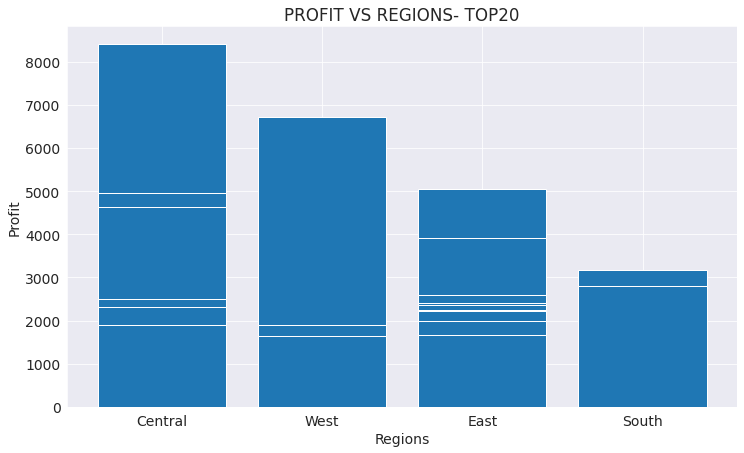

In [25]:
fig = plt.figure(figsize =(12, 7))

plt.bar(sorted_df['Region'].head(20),sorted_df['Profit'].head(20))
plt.title('PROFIT VS REGIONS- TOP20')
plt.xlabel('Regions')
plt.ylabel('Profit')
plt.show()

# Central Region stores are yielding high profits

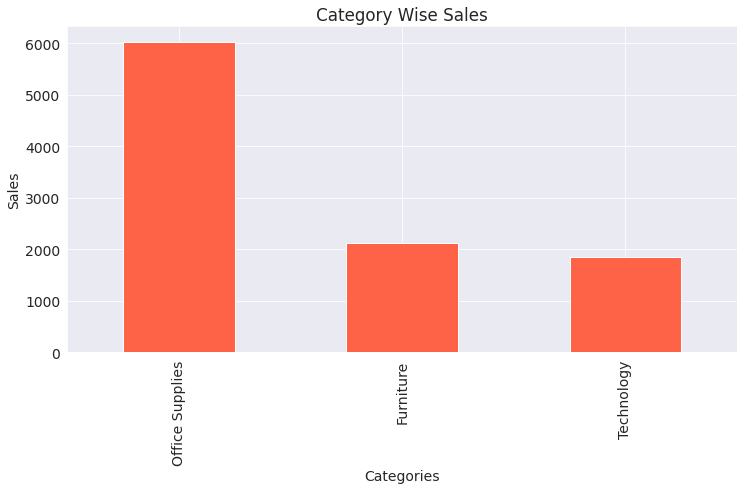

In [26]:
#Category wise sales
plt.figure(figsize=(12,6))
sorted_df['Category'].value_counts().plot.bar(color=['tomato'])
plt.title('Category Wise Sales')
plt.ylabel('Sales')
plt.xlabel('Categories')
plt.show()

# Office Supplies Category tops all the Sales in Categories

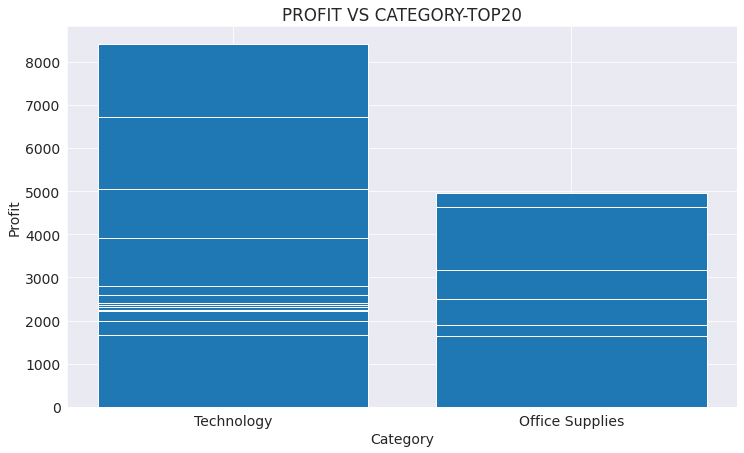

In [27]:
# Figure Size
fig = plt.figure(figsize =(12, 7))
 
# Horizontal Bar Plot
plt.bar(sorted_df['Category'].head(20),sorted_df['Profit'].head(20))
plt.title('PROFIT VS CATEGORY-TOP20')
plt.xlabel('Category')
plt.ylabel('Profit')
plt.show()
 
# High profitable sales are seen in Technology Category

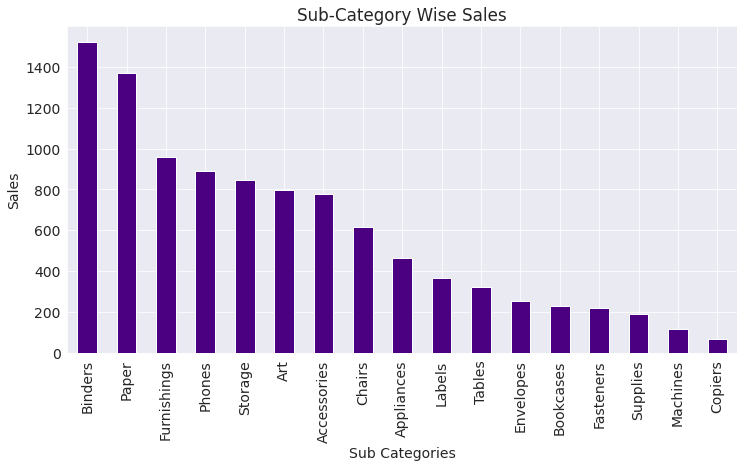

In [28]:
# Sub-Category wise Sales
plt.figure(figsize=(12,6))
sorted_df['Sub-Category'].value_counts().plot.bar(color=['indigo'])
plt.title('Sub-Category Wise Sales')
plt.ylabel('Sales')
plt.xlabel('Sub Categories')
plt.show()

# Binders tops all the Sales in Sub Categories

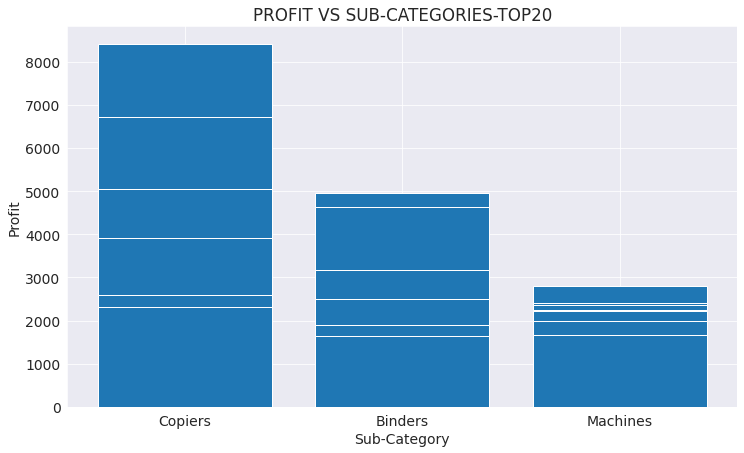

In [29]:
# Figure Size
fig = plt.figure(figsize =(12, 7))
 
# Horizontal Bar Plot
plt.bar(sorted_df['Sub-Category'].head(20),sorted_df['Profit'].head(20))
plt.title('PROFIT VS SUB-CATEGORIES-TOP20')
plt.xlabel('Sub-Category')
plt.ylabel('Profit')
plt.show()
 
# High profitable sales are seen in Sub-Category -Copiers and Binders

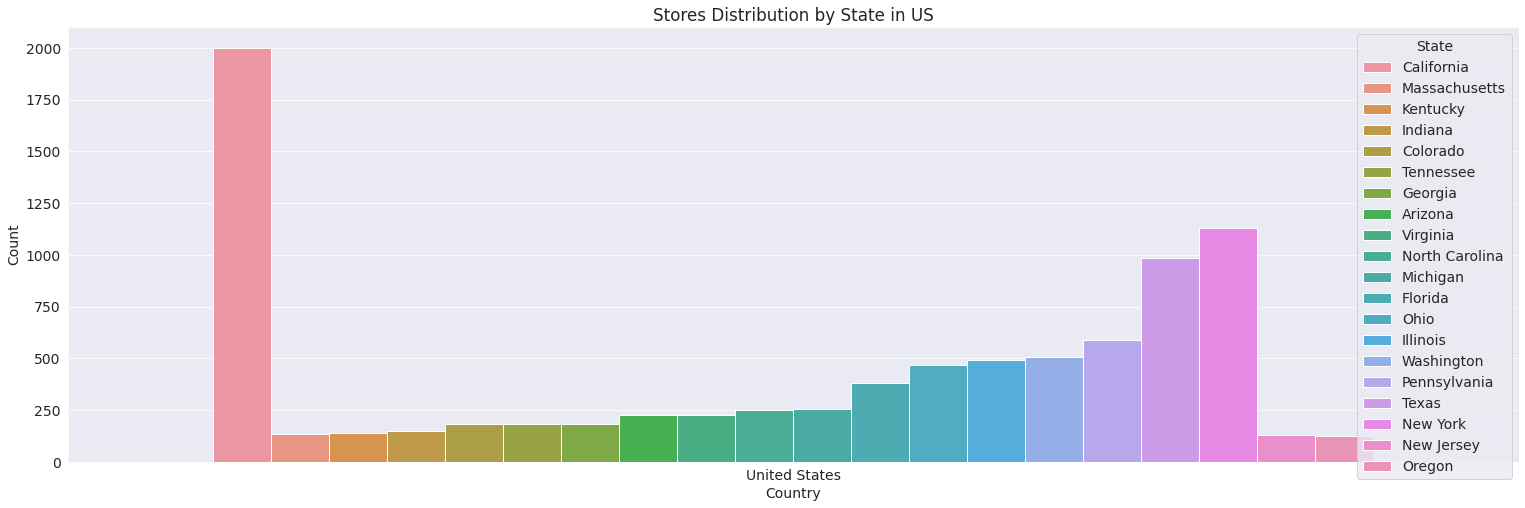

In [30]:
# Distribution of Sales by State - top 20
plt.figure(figsize=(26,8))
CusCountry = pd.DataFrame({'Count' : sorted_df.groupby(["Country","State"]).size()}).reset_index().sort_values('Count',ascending = False).head(20)
sns.barplot(x = "Country", y= "Count", hue="State", data = CusCountry.sort_values('Country'))
plt.title('Stores Distribution by State in US')
plt.show()

# In US - California has largest number of Stores followed by New York ,Texas & Pennsylvania

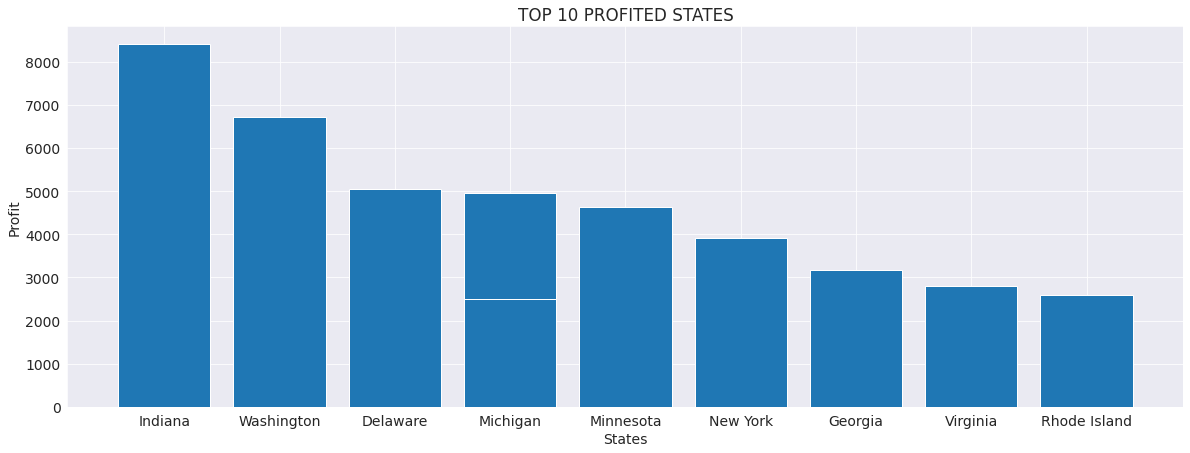

In [31]:
fig = plt.figure(figsize =(20, 7))
 
# Horizontal Bar Plot
plt.bar(sorted_df['State'].head(10),sorted_df['Profit'].head(10))
plt.title('TOP 10 PROFITED STATES')
plt.xlabel('States')
plt.ylabel('Profit')
plt.show() 

# From states with maximum stores New York has the maximum Profit margin

California has maximum number of stores, hence can affect overall turnover.

**Let's explore California!**

In [32]:
california_df = sorted_df[sorted_df.State=='California']
california_df

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
8858,Standard Class,Corporate,United States,Sacramento,California,West,Office Supplies,Binders,5083.960,5,0.2,1906.4850
3273,Standard Class,Home Office,United States,Los Angeles,California,West,Technology,Copiers,3359.952,6,0.2,1049.9850
4619,First Class,Home Office,United States,Los Angeles,California,West,Technology,Copiers,2879.952,6,0.2,1007.9832
9929,Same Day,Consumer,United States,San Francisco,California,West,Technology,Copiers,2799.960,5,0.2,944.9865
3983,Second Class,Consumer,United States,Los Angeles,California,West,Technology,Copiers,2799.960,5,0.2,944.9865
...,...,...,...,...,...,...,...,...,...,...,...,...
1505,Standard Class,Home Office,United States,Los Angeles,California,West,Furniture,Tables,1004.976,6,0.2,-175.8708
3480,Standard Class,Corporate,United States,San Francisco,California,West,Furniture,Tables,1421.664,6,0.2,-195.4788
557,Standard Class,Consumer,United States,Los Angeles,California,West,Furniture,Tables,1335.680,4,0.2,-217.0480
2539,Same Day,Corporate,United States,San Francisco,California,West,Furniture,Chairs,1348.704,6,0.2,-219.1644


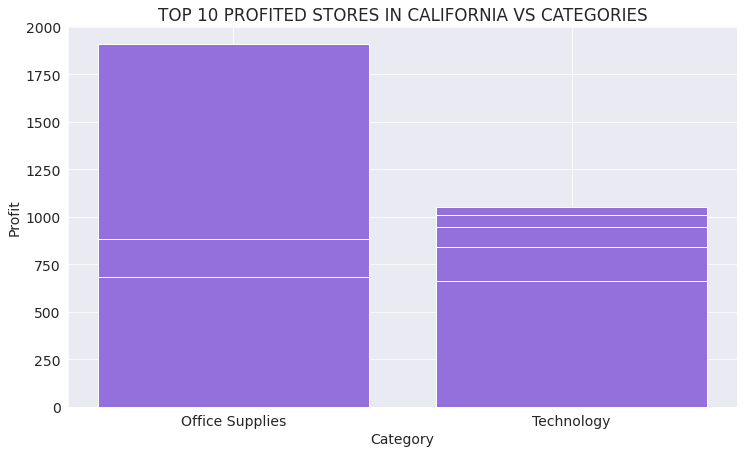

In [33]:
fig = plt.figure(figsize =(12, 7))

plt.bar(california_df['Category'].head(10),california_df['Profit'].head(10), color=['mediumpurple'])
plt.title('TOP 10 PROFITED STORES IN CALIFORNIA VS CATEGORIES')
plt.xlabel('Category')
plt.ylabel('Profit')
plt.show()

# Stores in California have major products of Office Supplies Category

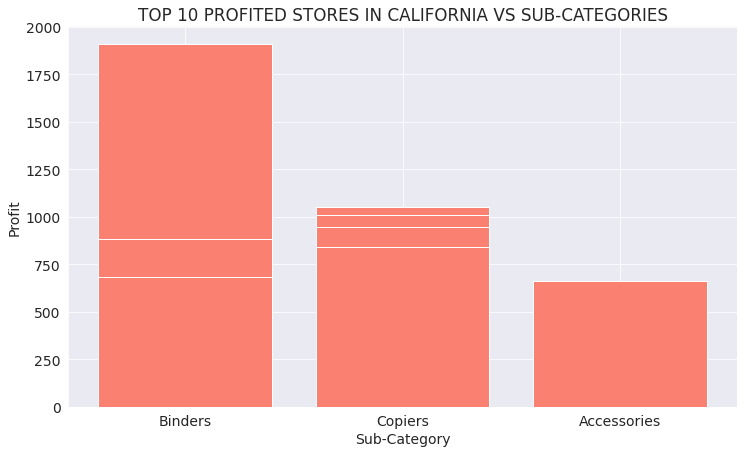

In [34]:
fig = plt.figure(figsize =(12, 7))
 

plt.bar(california_df['Sub-Category'].head(10),california_df['Profit'].head(10), color=['salmon'])
plt.title('TOP 10 PROFITED STORES IN CALIFORNIA VS SUB-CATEGORIES')
plt.xlabel('Sub-Category')
plt.ylabel('Profit')
plt.show()

# Stores in California have major products of Binders Sub-Category

We should try to modify the above observations and include more of technological products, especially of Copiers category. This might increase the turnover by manifolds!!

<h1>Conclusions derived<h1>

**Features for an ideal(gaining more profits) store are:-**
- Segment: Corporate
- Ship Mode: Standard class
- Region: Central
- Category: Technology
- Sub-Category: Copiers



**Currently the maximum stores have following features:-**<br>
- Segment: Consumer
- Ship Mode: Standard class
- Region: West
- Category: Office supplies
- Sub-Category: Binders

To increaes profit margin following can be taken into account:<br>
1) Increase stores that will sell more Technological products.<br>
2) Stores in Central region are experiencing good profits so look up for practices in these stores that can be implemented in other region's stores.<br>
3) Copiers and Binders are high demand sub categories and also profitable, so always make sure to keep them in stalk.

**Here New York can be considered as an ideal store here's why-**

In [35]:
new_york_df = sorted_df[sorted_df.State=='New York']
new_york_df

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
2623,First Class,Home Office,United States,New York City,New York,East,Technology,Copiers,11199.968,4,0.2,3919.9888
1085,Standard Class,Consumer,United States,Yonkers,New York,East,Technology,Machines,4899.930,7,0.0,2400.9657
6626,Standard Class,Consumer,United States,New York City,New York,East,Technology,Machines,6999.960,4,0.0,2239.9872
8204,Same Day,Corporate,United States,New York City,New York,East,Technology,Machines,4643.800,4,0.0,2229.0240
318,Standard Class,Home Office,United States,New York City,New York,East,Technology,Machines,3991.980,2,0.0,1995.9900
...,...,...,...,...,...,...,...,...,...,...,...,...
1562,Same Day,Consumer,United States,New York City,New York,East,Furniture,Tables,1044.630,5,0.4,-295.9785
2141,Standard Class,Corporate,United States,Long Beach,New York,East,Furniture,Tables,991.764,3,0.4,-347.1174
1669,Standard Class,Consumer,United States,New York City,New York,East,Furniture,Tables,1018.104,4,0.4,-373.3048
2357,Standard Class,Corporate,United States,New York City,New York,East,Furniture,Tables,1579.746,7,0.4,-447.5947


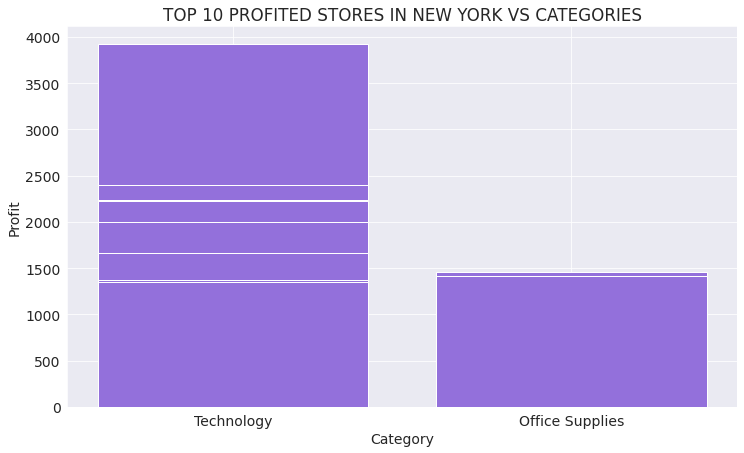

In [36]:
fig = plt.figure(figsize =(12, 7))

plt.bar(new_york_df['Category'].head(10),new_york_df['Profit'].head(10), color=['mediumpurple'])
plt.title('TOP 10 PROFITED STORES IN NEW YORK VS CATEGORIES')
plt.xlabel('Category')
plt.ylabel('Profit')
plt.show() 

# Stores in New York have major products of Technology Category

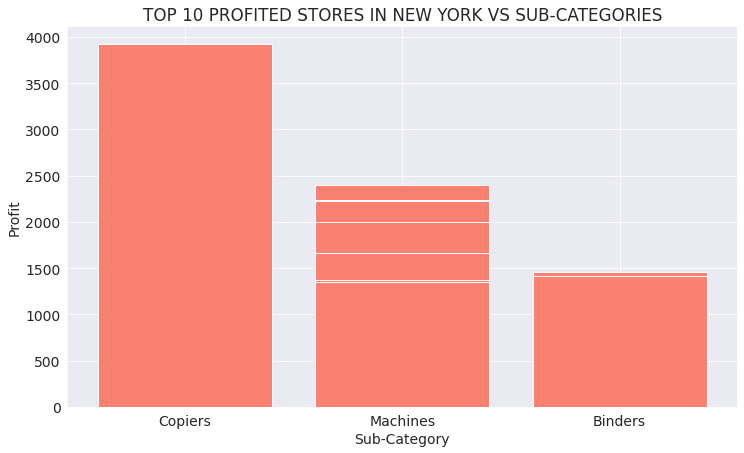

In [37]:
fig = plt.figure(figsize =(12, 7))
 

plt.bar(new_york_df['Sub-Category'].head(10),new_york_df['Profit'].head(10), color=['salmon'])
plt.title('TOP 10 PROFITED STORES IN NEW YORK VS SUB-CATEGORIES')
plt.xlabel('Sub-Category')
plt.ylabel('Profit')
plt.show() 

# Stores in New York have major products of Copiers Sub-Category

Thus, New York Stores have nearly all features of an ideal store.

**Ending Statements**<br>
The above observations won't be true for all stores, but if we talk about maximum portion they might give us a good amount profit and increase sales.